# Assignment 2: Ensemble Methods and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Yangruonan Lin
## UNI: yl5765


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [2]:
## Use this cell to import necessary packages
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, brier_score_loss
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [3]:
## YOUR CODE HERE
from google.colab import files
uploaded = files.upload()
bank_df = pd.read_csv('bank.csv')

bank_df.info()
bank_df.head()

Saving bank.csv to bank.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


In [4]:
## YOUR CODE HERE
na = bank_df.isnull().sum()
na_column = na[na > 0]
na_column # The output shows that there is NO missing value

,0



**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

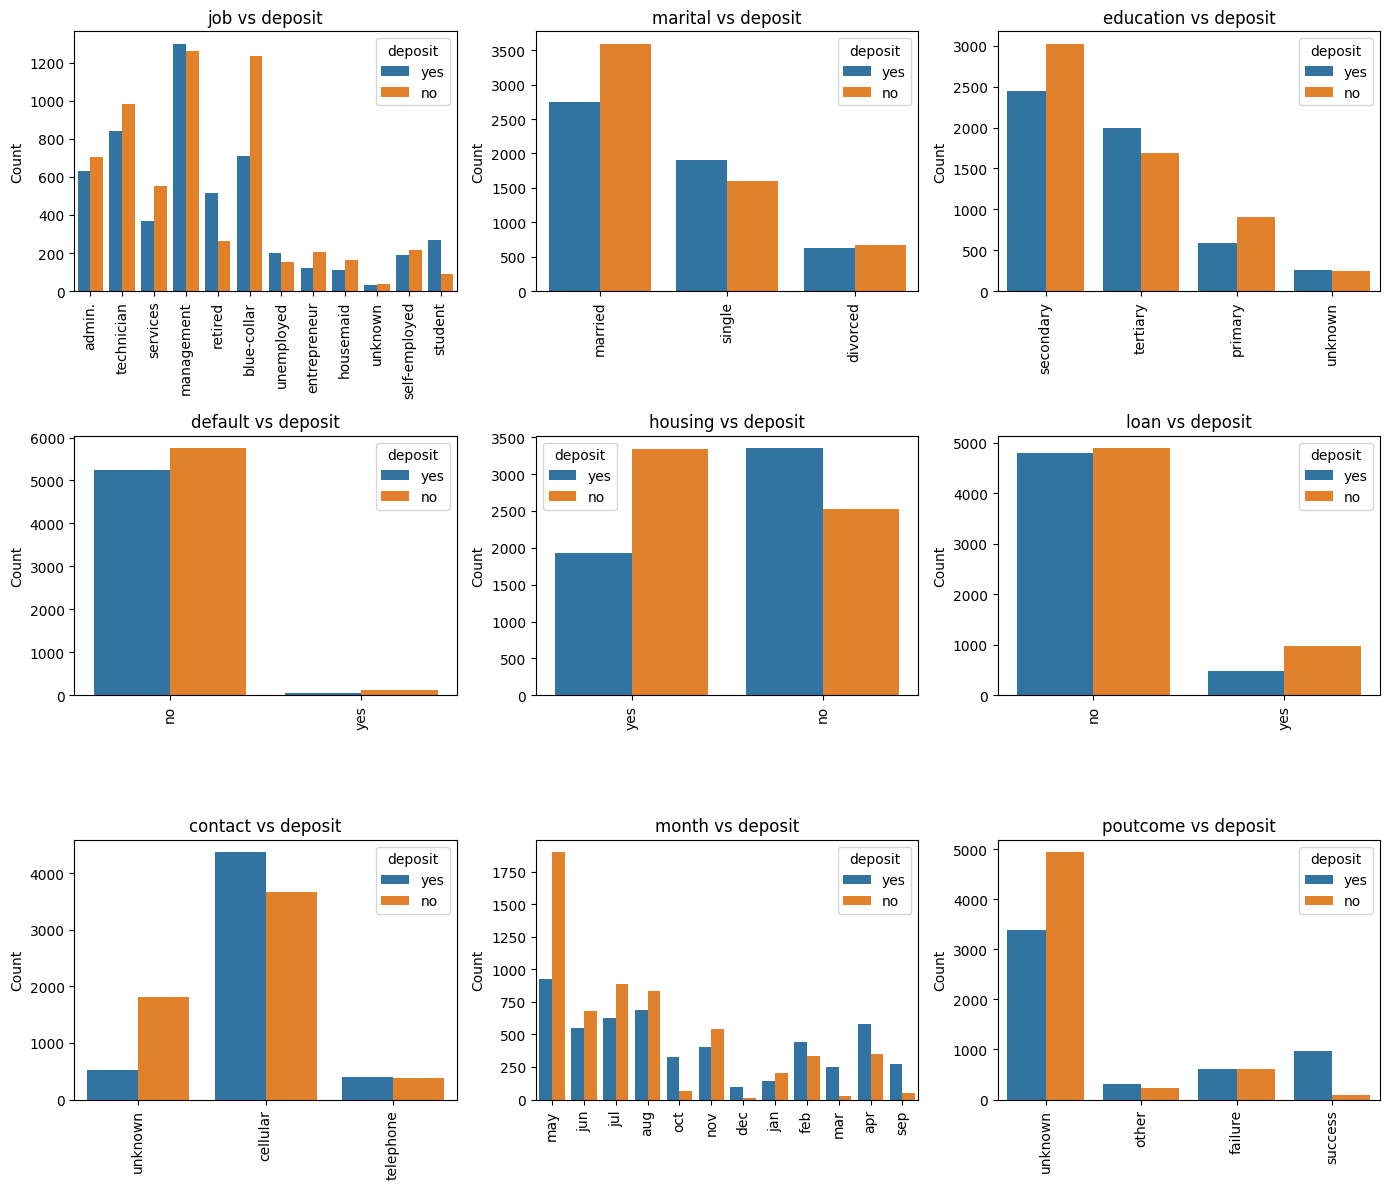

In [31]:
## YOUR CODE HERE
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))
axes = axes.flatten()

for i, j in enumerate(cat):
    sns.countplot(data=bank_df, x=j, hue='deposit', ax=axes[i])
    axes[i].set_title(f'{j} vs deposit')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**


In [ ]:
## YOUR COMMENT HERE
## For most of the features, the number of clients not subscribed to a term deposit is higher than those who did.
## And there shows significant imbalance of the data, especially for features such as default, loan, month, and poutcome.
## Notice that for contact and poutcome, "unknown" occupies a large portion (especially for poutcome), which can be
## considered as meaningless information.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [6]:
## YOUR CODE HERE
## Since the target variable is binary and imbalanced, I will use stratified splitting.
x = bank_df.drop(columns=['deposit'])
y = bank_df['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



In [11]:
## YOUR CODE HERE
## Although "contact" and "poutcome" contain a lot of unknowns, under the consideration of
## high performance of models, I still keep these two features.

## For binary categorical variables, we map 1 to "yes" and 0 to "no".
## For nominal categorical variables which contain multiple categories, we apply one-hot encoding.

## We don't need to apply scaling because we are building tree-based models, which don't depend
## on the madnitude of features.

binary = ['default', 'housing', 'loan']
nominal = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

trans = ColumnTransformer(
    transformers=[
        ('binary', OneHotEncoder(), binary),
        ('nominal', OneHotEncoder(), nominal),
        ('numerical', 'passthrough', numerical)
    ])

x_train_prepro = trans.fit_transform(x_train)
x_test_prepro = trans.transform(x_test)

label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.transform(y_test)

**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [12]:
## YOUR CODE HERE
## I will use F-1 score and accuracy because the target variable is binary, and the dataset
## is imbalanced.
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train_prepro, y_train_encode)

y_train_pre = tree.predict(x_train_prepro)
y_test_pre = tree.predict(x_test_prepro)

train_acc = accuracy_score(y_train_encode, y_train_pre)
train_f1 = f1_score(y_train_encode, y_train_pre)

test_acc = accuracy_score(y_test_encode, y_test_pre)
test_f1 = f1_score(y_test_encode, y_test_pre)

(train_acc, train_f1), (test_acc, test_f1)

((1.0, 1.0), (0.7913121361397224, 0.777246653919694))

**1.8: Visualize the trained tree until the suitable max_depth.**

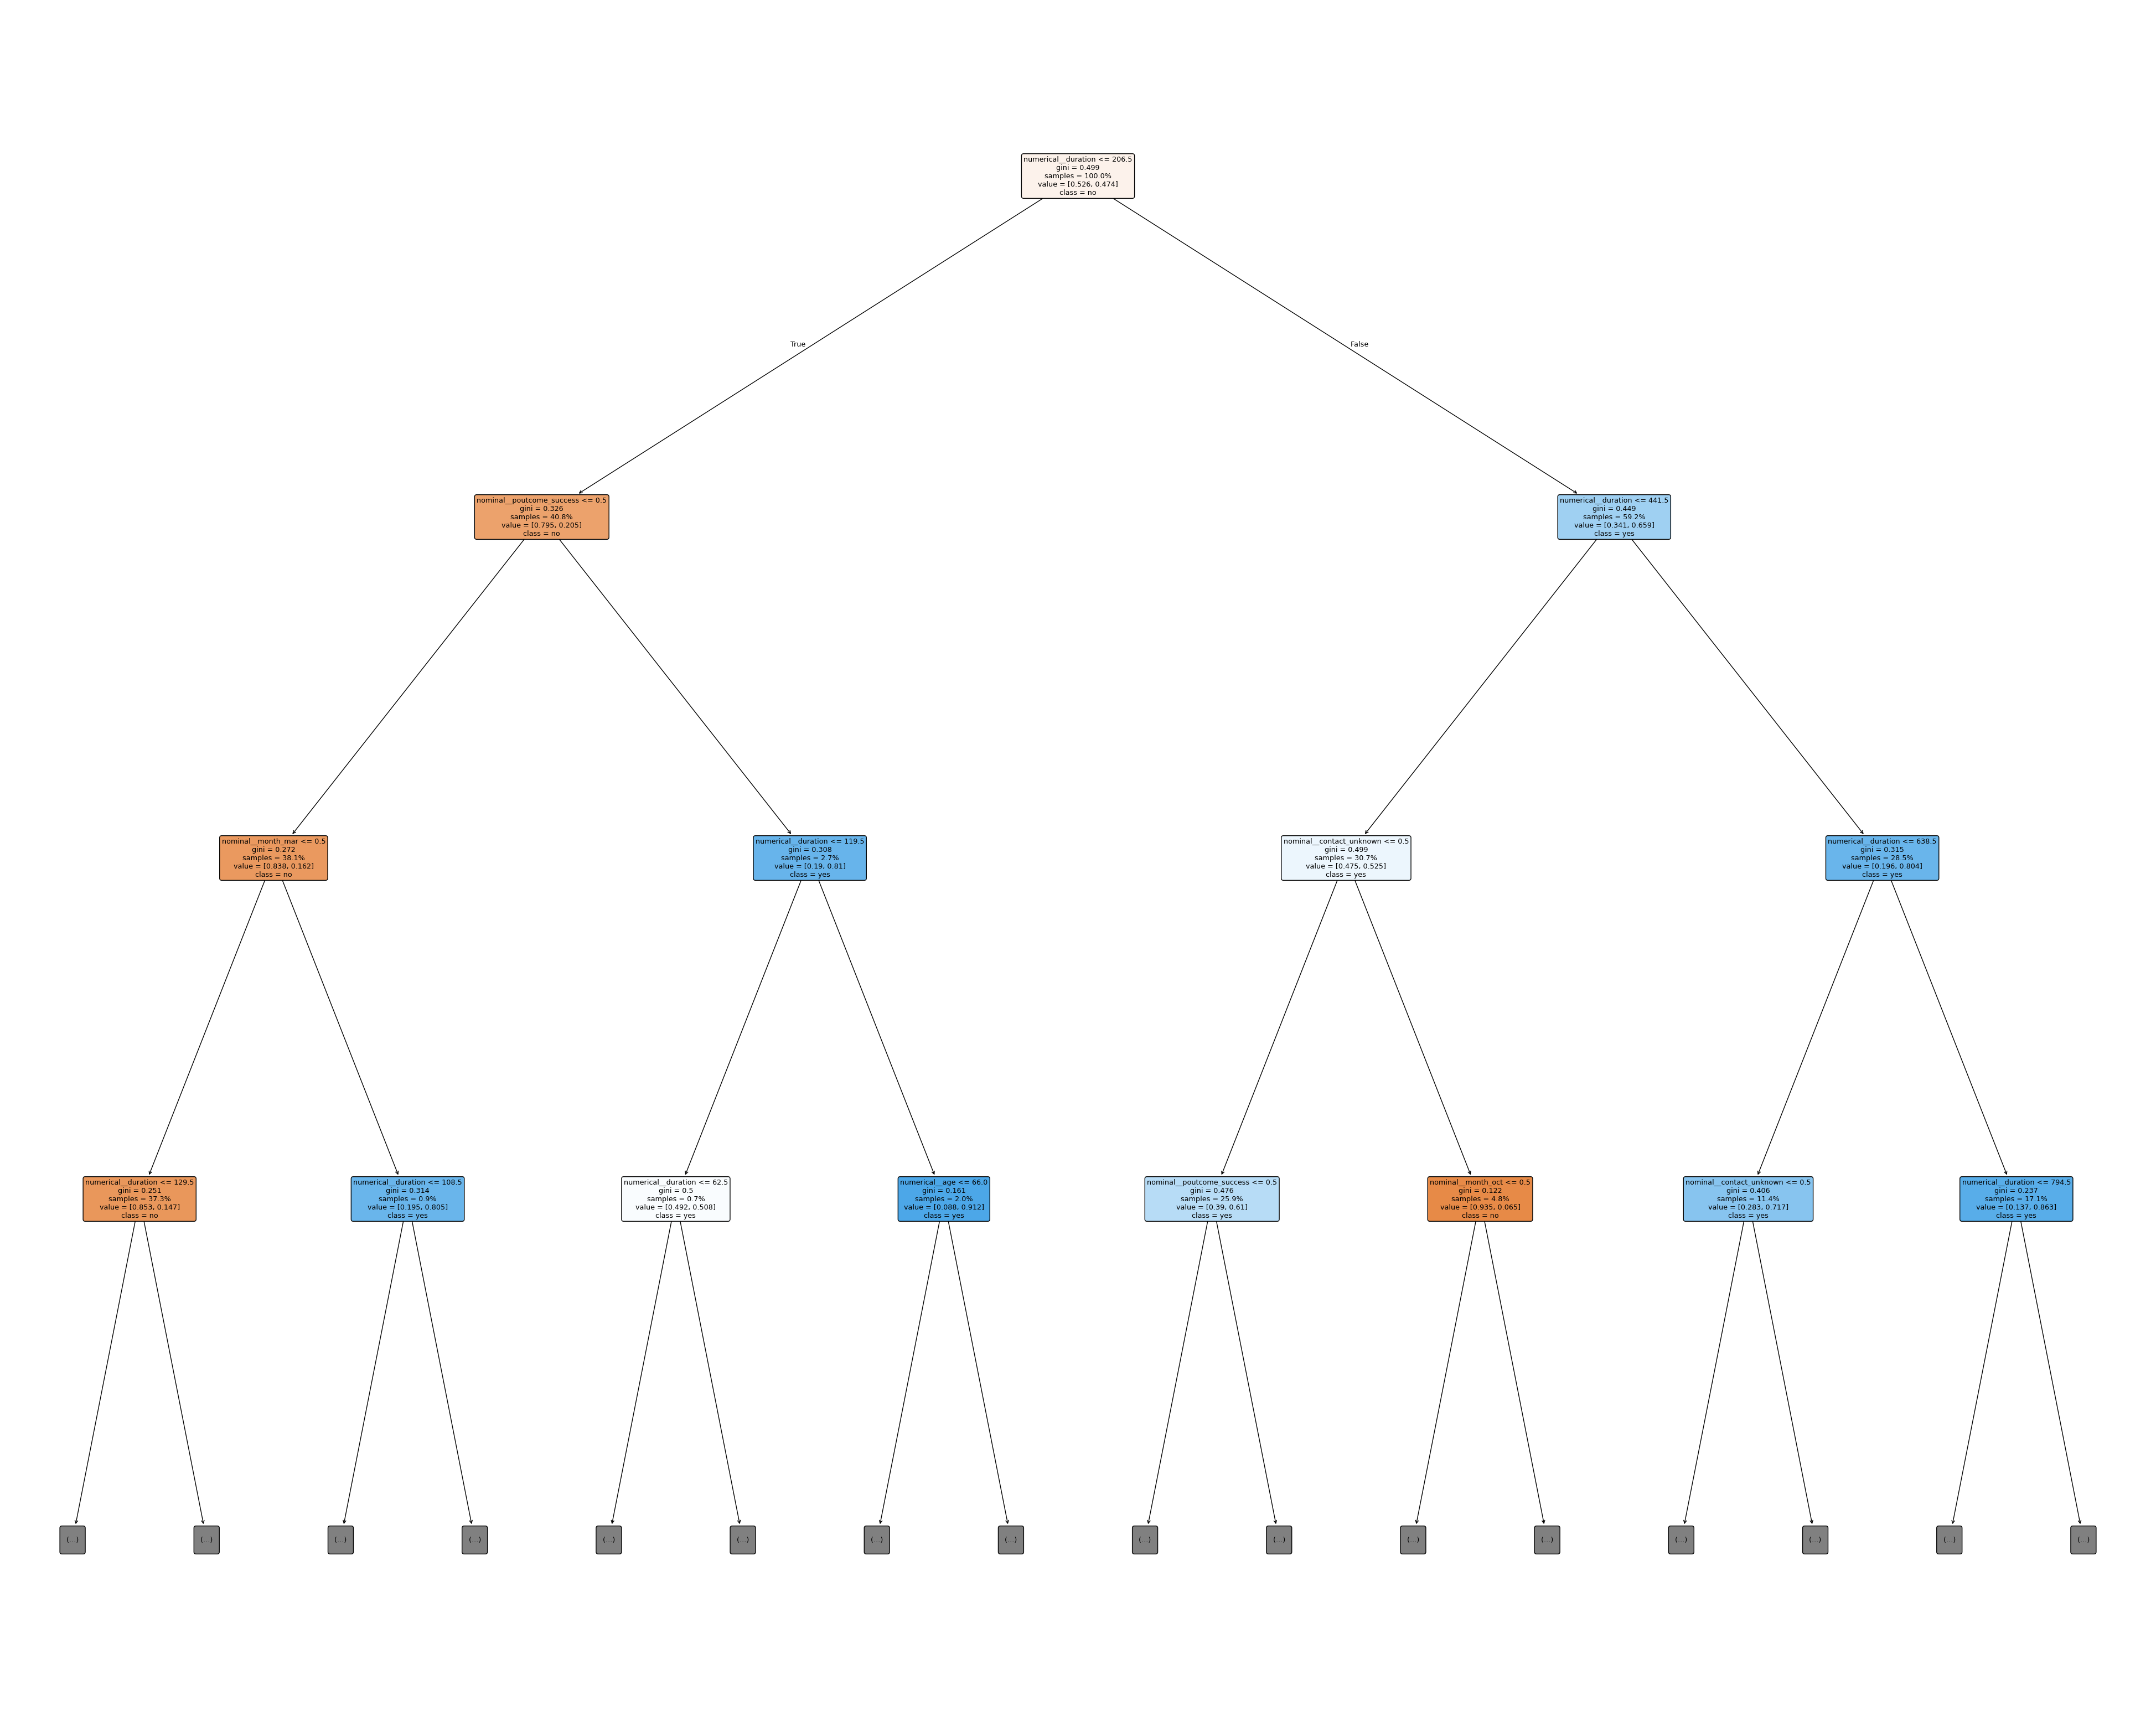

In [26]:
## YOUR CODE HERE
plt.figure(figsize=(50, 40))
plot_tree(
    tree,
    max_depth=3,
    feature_names=trans.get_feature_names_out(),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    proportion=True
)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

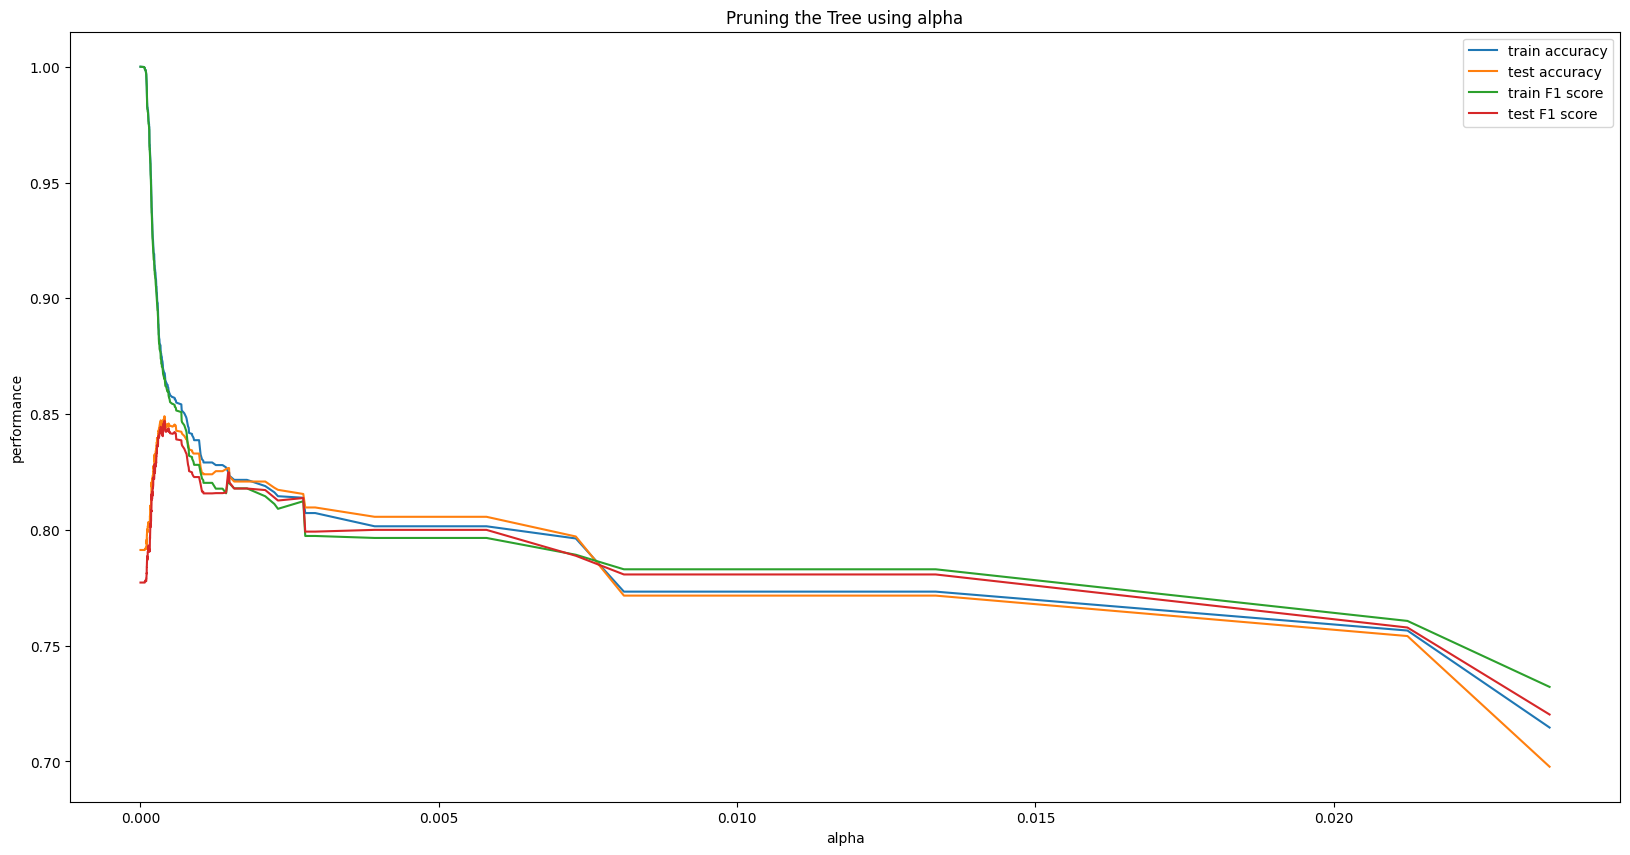

Optimal alpha: 0.0004016659644523039


((0.86773434875126, 0.865382423344352),
 (0.8490819525302284, 0.8471655328798186))

In [33]:
## YOUR CODE HERE
p = tree.cost_complexity_pruning_path(x_train_prepro, y_train_encode)
alphas, impurities = p.ccp_alphas, p.impurities

clfs = []
for ccp_alpha in alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train_prepro, y_train_encode)
    clfs.append(clf)

clfs = clfs[:-1]
alphas = alphas[:-1]

train_acc = [accuracy_score(y_train_encode, clf.predict(x_train_prepro)) for clf in clfs]
test_acc = [accuracy_score(y_test_encode, clf.predict(x_test_prepro)) for clf in clfs]
train_f1_score = [f1_score(y_train_encode, clf.predict(x_train_prepro)) for clf in clfs]
test_f1_score = [f1_score(y_test_encode, clf.predict(x_test_prepro)) for clf in clfs]

plt.figure(figsize=(20, 10))
plt.plot(alphas, train_acc, label="train accuracy")
plt.plot(alphas, test_acc, label="test accuracy")
plt.plot(alphas, train_f1_score, label="train F1 score")
plt.plot(alphas, test_f1_score, label="test F1 score")
plt.xlabel("alpha")
plt.ylabel("performance")
plt.title("Pruning the Tree using alpha")
plt.legend()
plt.show()

optimal_index = np.argmax(test_acc)
optimal_alpha = alphas[optimal_index]

print(f"Optimal alpha: {optimal_alpha}")

prune_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
prune_tree.fit(x_train_prepro, y_train_encode)

train_acc_prune = accuracy_score(y_train_encode, prune_tree.predict(x_train_prepro))
test_acc_prune = accuracy_score(y_test_encode, prune_tree.predict(x_test_prepro))

train_f1_prune = f1_score(y_train_encode, prune_tree.predict(x_train_prepro))
test_f1_prune = f1_score(y_test_encode, prune_tree.predict(x_test_prepro))

(train_acc_prune, train_f1_prune), (test_acc_prune, test_f1_prune)

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [15]:
## YOUR CODE HERE
feature_impor = prune_tree.feature_importances_
feature_name = trans.get_feature_names_out()

impor_df = pd.DataFrame({
    'Feature': feature_name,
    'Importance': feature_impor
})

impor_df = impor_df.sort_values(by='Importance', ascending=False)
top_3_feat = impor_df.head(3)

print(top_3_feat)

## For "numerical_duration", it is reasonable that the longer a client talks to a staff,
## the more likely that he/she is interested in deposit, thus this feature is important.
## For "nominal_poutcome_success", clients who responded "yes" to previous marketing campaigns
## would be more likely to make a term deposit again.
## For "nominal__contact_unknown", although we don't know exactly what type of contact method
## the clients were using, one thing that we are sure is the clients who tend to make
## a deposit prefer not telling us the contact communication types they are using.

                      Feature  Importance
47        numerical__duration    0.467591
42  nominal__poutcome_success    0.119540
27   nominal__contact_unknown    0.106261


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [16]:
## YOUR CODE HERE
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train_prepro, y_train_encode)

y_train_pre_1 = forest.predict(x_train_prepro)
y_test_pre_1 = forest.predict(x_test_prepro)

test_1_acc = accuracy_score(y_test_encode, y_test_pre_1)
test_1_f1 = f1_score(y_test_encode, y_test_pre_1)

test_1_acc, test_1_f1

## This model performs better than Decision Tree as the accuracy and F1 score are higher
## than results in Q1.7.

(0.8571428571428571, 0.8545371637026904)

**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [17]:
## YOUR CODE HERE
trees = forest.estimators_
pure_trees = []
for tree in trees:
    children_l = tree.tree_.children_left
    children_r = tree.tree_.children_right
    leaf = (children_l == -1) & (children_r == -1)
    leaf_amount = tree.tree_.value[leaf]
    pure_leaf = all(np.count_nonzero(leaf[0]) == 1 for leaf in leaf_amount)
    pure_trees.append(pure_leaf)

num_pure_leaf_trees = sum(pure_trees)

print(num_pure_leaf_trees) # The result shows that all trees have pure leaves.

mean_acc = forest.score(x_test_prepro, y_test_encode)
print(mean_acc)

100
0.8571428571428571


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [ ]:
## YOUR SOLUTION HERE
## I would choose "n_estimators" because more trees would reduce the variance so to improve the model's stability.
## I would also choose "max_depth" because if the current depth is too high causing overfitting, we can lower
## the max depth so that the model could handle test data better. On the other hand, if the depth is not high
## enough, the model tend to be underfitting, so we can higher the depth to improve the model performance.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [ ]:
## YOUR SOLUTION HERE
## For "n_estimators", we should choose values so that the range is large enough to capture the whole picture.
## Thus, a good strategy is to start from a small number, gradually increase the value, and finally reach a
## max value. e.g. [100, 200, 300, 400, 500]
## Similarly, for "max_depth", we should start from a small value (shallow tree), then gradually deepen the tree
## by highering the value of "max_depth". e.g. [3, 5, 10, 15, 20]

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [18]:
## YOUR CODE HERE
n_estimators_propose = [100, 200, 300, 400, 500]
max_depth_propose = [3, 5, 10, 15, 20]

best_oob = 0
best_params = {}

for n_estimators in n_estimators_propose:
    for max_depth in max_depth_propose:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            oob_score=True,
            random_state=42
        )

        rf.fit(x_train_prepro, y_train_encode)
        oob_score = rf.oob_score_

        if oob_score > best_oob:
            best_oob = oob_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    oob_score=True,
    random_state=42
)

best_rf.fit(x_train_prepro, y_train_encode)

y_train_best_pre = best_rf.predict(x_train_prepro)
train_acc_opt = accuracy_score(y_train_encode, y_train_best_pre)
train_f1_opt = f1_score(y_train_encode, y_train_best_pre)

y_test_best_pre = best_rf.predict(x_test_prepro)
test_acc_opt = accuracy_score(y_test_encode, y_test_best_pre)
test_f1_opt = f1_score(y_test_encode, y_test_best_pre)

print(f"Best OOB Score: {best_oob:.4f}")
print(f"Optimal hyperparameters: {best_params}")
print(f"Optimal Model: train accuracy: {train_acc_opt}, train F1 score: {train_f1_opt}")
print(f"Optimal Model: test accuracy: {test_acc_opt}, test F1 score: {test_f1_opt}")

## The performance is nearly the same as the previous one.

Best OOB Score: 0.8523
Optimal hyperparameters: {'n_estimators': 300, 'max_depth': 20}
Optimal Model: train accuracy: 0.9960801881509688, train F1 score: 0.9958653278204371
Optimal Model: test accuracy: 0.8557993730407524, test F1 score: 0.8535031847133758


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [19]:
## YOUR CODE HERE
feature_impor = best_rf.feature_importances_
feature_name = trans.get_feature_names_out()

impor_df = pd.DataFrame({
    'Feature': feature_name,
    'Importance': feature_impor
})

impor_df = impor_df.sort_values(by='Importance', ascending=False)

top_3_features_rf = impor_df.head(3)
print(top_3_features_rf)

## For both models, the feature "numerical_duration" is the same,
## but the other two features are completely different.
## I think the second set makes more sense, because "nominal__contact_unknown" cannot provide
## very detailed information about clients' contact preference. On the other hand, the second set
## of features are intuitive and straightforward.

                Feature  Importance
47  numerical__duration    0.340597
45   numerical__balance    0.072743
44       numerical__age    0.069362


## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [20]:
## YOUR CODE HERE
import time
value = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

hgb = HistGradientBoostingClassifier(random_state=42)
grid_hgb = GridSearchCV(estimator=hgb, param_grid=value, cv=5, scoring='accuracy', n_jobs=-1)

start = time.time()

grid_hgb.fit(x_train_prepro, y_train_encode)

end = time.time()
time_taken = end - start

best_params = grid_hgb.best_params_ # Best hyperparameters
best_score = grid_hgb.best_score_ # Best cross-validation accuracy

optimal = grid_hgb.best_estimator_

y_test_pre = optimal.predict(x_test_prepro)
test_acc = accuracy_score(y_test_encode, y_test_pre)
test_f1 = f1_score(y_test_encode, y_test_pre)

print(f"Time taken for model selection: {time_taken:.2f} s")
print(f"Test dataset performance: accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}")

Time taken for model selection: 139.44 s
Test dataset performance: accuracy: 0.8657, F1 Score: 0.8619


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [21]:
## YOUR CODE HERE
value = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=value, cv=5, scoring='accuracy', n_jobs=-1)
start = time.time()

grid_xgb.fit(x_train_prepro, y_train_encode)

end = time.time()
time_xgb = end - start

best_params_xgb = grid_xgb.best_params_ # Best hyperparameters
best_score_xgb = grid_xgb.best_score_ # Best cross-validation accuracy

optimal_xgb = grid_xgb.best_estimator_

y_test_pre_xgb = optimal_xgb.predict(x_test_prepro)
test_acc_xgb = accuracy_score(y_test_encode, y_test_pre_xgb)
test_f1_xgb = f1_score(y_test_encode, y_test_pre_xgb)

print(f"Time taken for XGBoost model selection: {time_xgb:.2f} s")
print(f"Test dataset performance: accuracy: {test_acc_xgb:.4f}, F1 Score: {test_f1_xgb:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Time taken for XGBoost model selection: 83.24 s
Test dataset performance: accuracy: 0.8652, F1 Score: 0.8615


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

I prefer XGBoost model, although both the accuracy and F1 score are slightly lower than that of HistGradientBoostingClassifier, the time taken for XGBoost is much faster than the other one.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [22]:
## YOUR CODE HERE
impor_xgb = optimal_xgb.feature_importances_
names_xgb = trans.get_feature_names_out()

impor_df_xgb = pd.DataFrame({
    'Feature': names_xgb,
    'Importance': impor_xgb
})

impor_df_xgb = impor_df_xgb.sort_values(by='Importance', ascending=False)

top_3_xgb = impor_df_xgb.head(3)
print(top_3_xgb)

## The first two features are the same as Decision Tree. The last one is
## different from both models.

                      Feature  Importance
42  nominal__poutcome_success    0.173197
27   nominal__contact_unknown    0.137665
35         nominal__month_mar    0.052440


**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [23]:
## YOUR CODE HERE
top_5 = impor_df_xgb['Feature'].head(5).values

x_train_top5 = pd.DataFrame(x_train_prepro, columns=names_xgb)[top_5]
x_test_top5 = pd.DataFrame(x_test_prepro, columns=names_xgb)[top_5]

value = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

xgb_top5 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb_top5 = GridSearchCV(estimator=xgb_top5, param_grid=value, cv=5, scoring='accuracy', n_jobs=-1)

start_top5 = time.time()

grid_xgb_top5.fit(x_train_top5, y_train_encode)

end_top5 = time.time()
time_top5 = end_top5 - start_top5

best_params_top5 = grid_xgb_top5.best_params_ # Best hyperparameters
best_cv_score_xgb_top5 = grid_xgb_top5.best_score_ # Best cross-validation accuracy

optimal_xgb_top5 = grid_xgb_top5.best_estimator_

y_test_pre_top5 = optimal_xgb_top5.predict(x_test_top5)
test_acc_top5 = accuracy_score(y_test_encode, y_test_pre_top5)
test_f1_top5 = f1_score(y_test_encode, y_test_pre_top5)

print(f"Time taken for XGBoost model selection: {time_top5:.2f} s")
print(f"Test dataset performance: accuracy: {test_acc_top5:.4f}, F1 Score: {test_f1_top5:.4f}")

## There is a trade-off for these two models in terms of efficiency and accuracy.
## If the goal is to execute as fast as possible, I would like to choose this model.
## If the goal is to get the most accurate results, I would like to choose the model in Q3.2.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Time taken for XGBoost model selection: 30.82 s
Test dataset performance: accuracy: 0.8061, F1 Score: 0.8031


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
## YOUR CODE HERE
y_test_xgb_proba = optimal_xgb.predict_proba(x_test_prepro)
y_test_proba_pos = y_test_xgb_proba[:, 1]
bs = brier_score_loss(y_test_encode, y_test_proba_pos)

print(f"Brier Score for the XGBoost model on test dataset: {bs:.4f}")

Brier Score for the XGBoost model on test dataset: 0.1101


**4.2: Calibrate the trained XGBoost model using isotonic regression. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

Brier Score after calibration: 0.1174


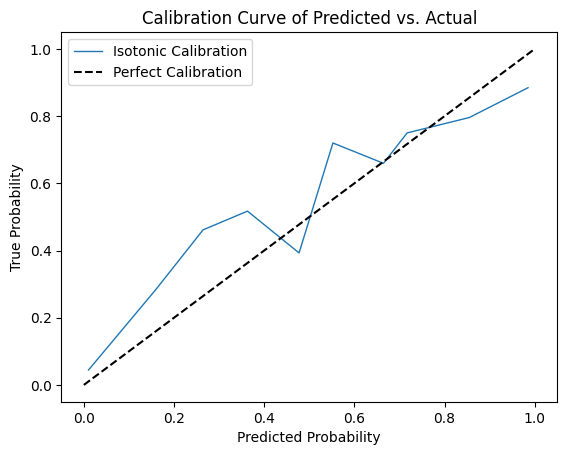

In [ ]:
## YOUR CODE HERE
cali = CalibratedClassifierCV(estimator=optimal_xgb, method='isotonic', cv='prefit')
cali.fit(x_train_prepro, y_train_encode)

y_test_cali_proba = cali.predict_proba(x_test_prepro)
y_test_cali_pos_proba = y_test_cali_proba[:, 1]

brier_score_cali = brier_score_loss(y_test_encode, y_test_cali_pos_proba)

print(f"Brier Score after calibration: {brier_score_cali:.4f}")

true_proba, pre_proba = calibration_curve(y_test_encode, y_test_cali_pos_proba, n_bins=10)

plt.plot(pre_proba, true_proba, linewidth=1, label="Isotonic Calibration")
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Perfect Calibration")

plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve of Predicted vs. Actual")
plt.legend()
plt.show()

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**